# MNIST

## Importing Data

In [2]:
from sklearn.datasets import fetch_openml
raw_data = fetch_openml('mnist_784', version = 1, cache = True)
raw_data['data'], raw_data['target']

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [3]:
print(raw_data['data'].shape)
print(raw_data['target'].shape)

(70000, 784)
(70000,)


## Creating Variables

In [4]:
X, y = raw_data['data'], raw_data['target']

## Using matplotlib to plot the numbers

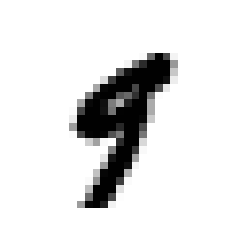

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

def plot_num(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
  plt.axis("off")

plot_num(X[36000])

In [6]:
y[36000]

'9'

## Spliting the data

In [7]:
import numpy as np
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a SGD Classifier 

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [9]:
sgd_clf.predict(X[36001].reshape(1, -1))

array(['2'], dtype='<U1')

## Using decision_function() to evaluate prediction scores

In [10]:
some_digit_scores = sgd_clf.decision_function(X[36001].reshape(1, -1))
some_digit_scores

array([[ -489658.71340101,  -383202.90044063,    53316.92581283,
         -158599.16091848,  -297145.09808063,  -221210.30470555,
         -487874.74132505, -1139394.38931629,  -125243.47375114,
         -894482.02523609]])

In [11]:
np.argmax(some_digit_scores)

2

In [12]:
sgd_clf.classes_[2]

'2'

## Creating a RandomForestClassifier model

In [13]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_clf.predict_proba(X[36001].reshape(1, -1))

array([[0.  , 0.  , 0.95, 0.02, 0.  , 0.01, 0.  , 0.  , 0.01, 0.01]])

## Using cross_val_score for better evaluation

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv  = 3, scoring = 'accuracy')

array([0.876  , 0.86315, 0.87085])

## Evaluating cross_val_score for RandomForestClassifier

In [15]:
cross_val_score(forest_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.96615, 0.96705, 0.9639 ])

## Standardizing the values, for better results

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

## Evaluating cross_val_score for standardizd data

In [17]:
sc_pred = cross_val_score(forest_clf, X_train_sc, y_train, cv = 3, scoring = 'accuracy')
sc_pred

array([0.9667 , 0.96745, 0.96325])

## Predicting the whole train set

In [18]:
y_pred = forest_clf.predict(X_train)

## Creating a confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
confu_mat = confusion_matrix(y_train, y_pred)

In [20]:
confu_mat

array([[5923,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6742,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5958,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6131,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5842,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5421,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5918,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6265,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5851,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5949]],
      dtype=int64)

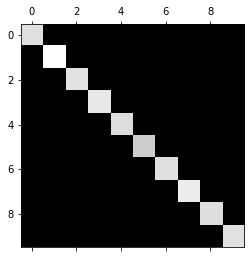

In [21]:
plt.matshow(confu_mat, cmap = plt.cm.gray)

## Evaluating f1_score

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred, average = 'macro')

1.0

## Predicting the test set

In [23]:
y_test_pred = forest_clf.predict(X_test)

In [24]:
f1_score(y_test, y_test_pred, average = 'macro')

0.9693470686660103

## Exporting the model as joblib

In [25]:
import sklearn.externals
import joblib
joblib.dump(forest_clf, 'Project.joblib')

['Project.joblib']